# 使用PCA及KernelPCA進行影像去躁

## 載入相關套件

In [13]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 載入資料

In [14]:
X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True, parser="pandas")
X = MinMaxScaler().fit_transform(X)
X.shape

(9298, 256)

## 資料分割

In [15]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1_000, test_size=100
)

# 加躁
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

## 繪製原圖及加入雜訊的影像

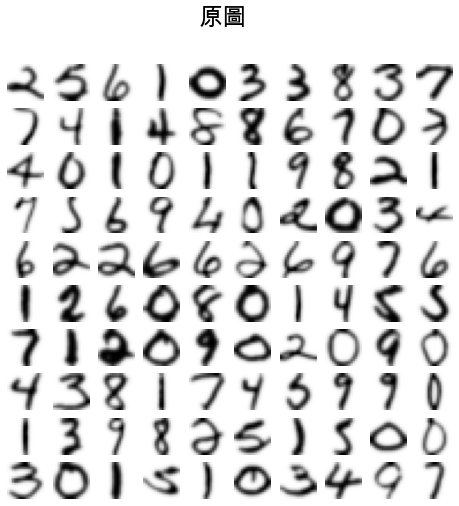

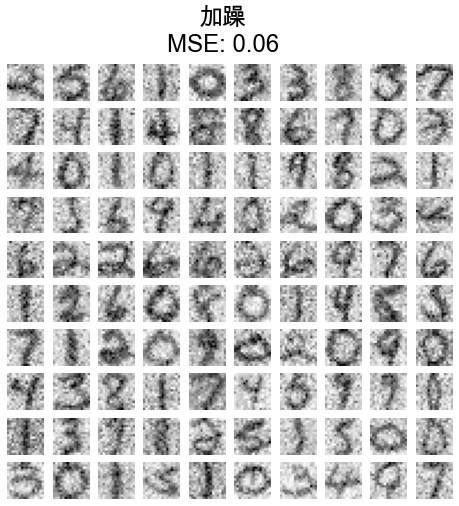

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

# 繪圖函數
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)
    
# 繪製原圖
plot_digits(X_test, "原圖")
plot_digits(
    X_test_noisy, f"加躁\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)    

## PCA及Kernel PCA 轉換

In [17]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=32)
kernel_pca = KernelPCA(
    n_components=400, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3
)

pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

## 使用 inverse_transform 重建影像

In [18]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(X_test_noisy)
)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

## PCA 重建影像繪圖

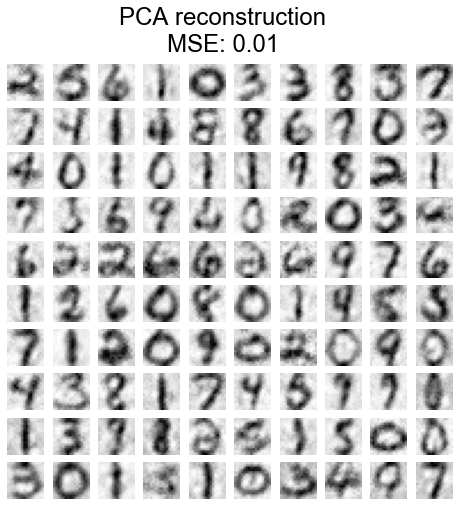

In [19]:
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)

## Kernel PCA 重建影像繪圖

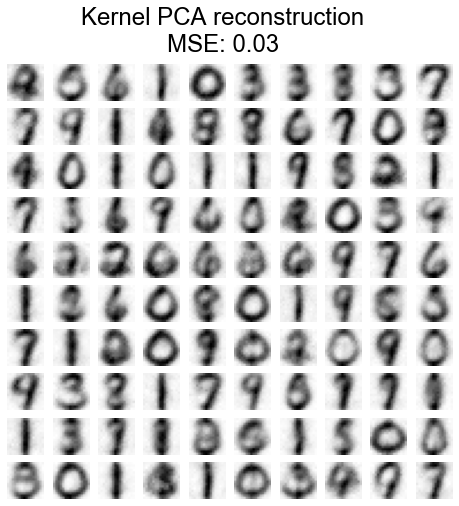

In [20]:
plot_digits(
    X_reconstructed_kernel_pca,
    "Kernel PCA reconstruction\n"
    f"MSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}",
)

# 結論：PCA雖然比 Kernel PCA 的MSE小，但 Kernel PCA 去躁效果比較好